# Homework 04

### Atahan Tap
### 69374

In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Importing Data

In [14]:
data_set = np.genfromtxt("hw04_data_set_train.csv", delimiter = ",")
x_training = np.array([[d[0],  d[1]] for d in data_set])
y_training = np.ones(len(data_set))


data_set = np.genfromtxt("hw04_data_set_test.csv", delimiter = ",")
x_test = np.array([[d[0],  d[1]] for d in data_set])
y_test = np.ones(len(data_set))

K = np.max(y_training)
N = data_set.shape[0]

### Common Parameters

In [15]:
min_val = 0.0
max_val = 2.0
data_interval = np.linspace(min_val, max_val, 201)
h = 0.1
left_borders = np.arange(min_val, max_val, h)
right_borders = np.arange(min_val + h, max_val + h, h)

## Histogram Estimator

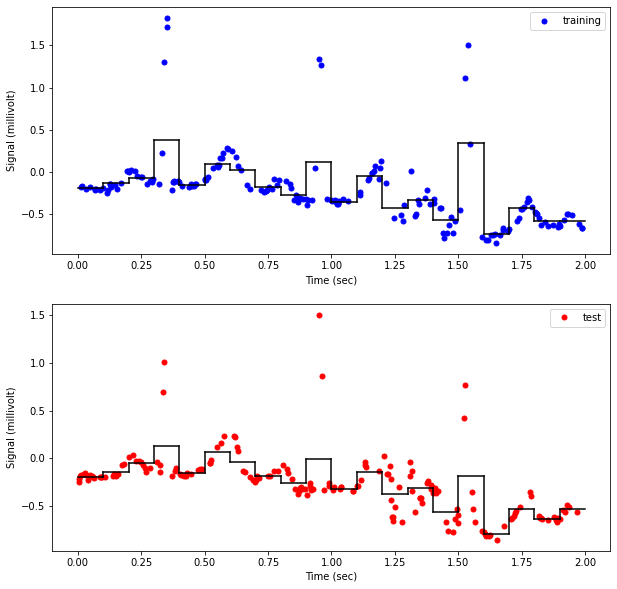

In [16]:
# Training set

p_estimate = np.asarray([np.sum(((left_borders[b] < x_training[:,0]) & 
                                 (x_training[:,0] <= right_borders[b])) * x_training[:,1]) 
                         for b in range(len(left_borders))]) / np.asarray([np.sum((left_borders[b] < x_training[:,0]) & 
                                                                                  (x_training[:,0] <= right_borders[b])) 
                                                                           for b in range(len(left_borders))])


fig, ax = plt.subplots(2, 1, figsize=(10,10)) 
plt.subplot(2, 1, 1)
plt.plot(x_training[:,0], x_training[:,1], "b.", markersize = 10, label="training")

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_estimate[b], p_estimate[b]], "k-")
    
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_estimate[b], p_estimate[b + 1]], "k-") 
    
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")  
plt.legend(prop={'size': 10})


# Test set

left_borders = np.arange(min_val, max_val, h)
right_borders = np.arange(min_val + h, max_val + h, h)
p_estimate = np.asarray([np.sum(((left_borders[b] < x_test[:,0]) & (x_test[:,0] <= right_borders[b])) * x_test[:,1]) 
                         for b in range(len(left_borders))]) / np.asarray([np.sum((left_borders[b] < x_test[:,0]) & 
                                                                                  (x_test[:,0] <= right_borders[b])) 
                                                                           for b in range(len(left_borders))])


plt.subplot(2, 1, 2)
plt.plot(x_test[:,0], x_test[:,1], "r.", markersize = 10, label = "test")

for b in range(len(left_borders)):
    plt.plot([left_borders[b], right_borders[b]], [p_estimate[b], p_estimate[b]], "k-")
    
for b in range(len(left_borders) - 1):
    plt.plot([right_borders[b], right_borders[b]], [p_estimate[b], p_estimate[b + 1]], "k-")    
    
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)") 
plt.legend(prop={'size': 10})

plt.show()

### Root Mean Square Error

In [17]:
index = []

for i in x_test[:,0]:
    for r in range(len(right_borders)):
        if i < right_borders[r]: 
            index.append(r)
            break
            
index = np.array(index)

In [18]:
RMSE = (np.sum(([p_estimate[i] for i in index] - x_test[:,1])**2) / N)**0.5

print("Regressogram => RMSE is {} when h is {}".format(RMSE, h))

Regressogram => RMSE is 0.22534771176937957 when h is 0.1


## Running Mean Smoother

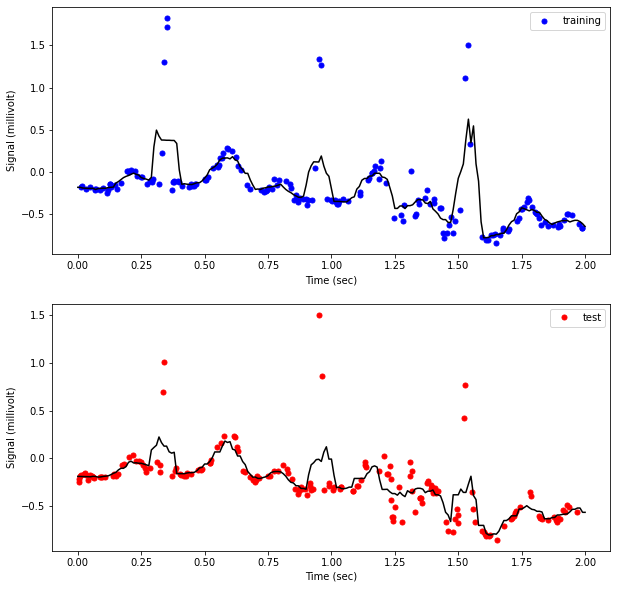

In [19]:
# Training set

p_estimate = np.asarray([np.sum((((x - 0.5 * h) < x_training[:,0]) & 
                                 (x_training[:,0] <= (x + 0.5 * h))) * x_training[:,1]) 
                         for x in data_interval]) / np.asarray([np.sum(((x - 0.5 * h) < x_training[:,0]) & 
                                                                       (x_training[:,0] <= (x + 0.5 * h))) 
                                                                for x in data_interval]) 


fig, ax = plt.subplots(2, 1, figsize=(10,10)) 
plt.subplot(2, 1, 1)
plt.plot(x_training[:,0], x_training[:,1], "b.", markersize = 10, label = "training")
plt.plot(data_interval, p_estimate, "k-")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")  
plt.legend(prop={'size': 10})


# Test set

p_estimate = np.asarray([np.sum((((x - 0.5 * h) < x_test[:,0]) & 
                                 (x_test[:,0] <= (x + 0.5 * h))) * x_test[:,1]) 
                         for x in data_interval]) / np.asarray([np.sum(((x - 0.5 * h) < x_test[:,0]) & 
                                                                       (x_test[:,0] <= (x + 0.5 * h))) 
                                                                for x in data_interval]) 


plt.subplot(2, 1, 2)
plt.plot(x_test[:,0], x_test[:,1], "r.", markersize = 10, label = "test")
plt.plot(data_interval, p_estimate, "k-")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")  
plt.legend(prop={'size': 10})

plt.show()

### Root Mean Square Error

In [20]:
index = []

for i in x_test[:,0]:
    for r in range(len(data_interval)):
        if i < data_interval[r]: 
            index.append(r)
            break
            
index = np.array(index)

In [21]:
RMSE = (np.sum(([p_estimate[i] for i in index]- x_test[:,1])**2) / N ) ** 0.5

print("Running Mean Smoother => RMSE is {} when h is {}".format(RMSE, h))

Running Mean Smoother => RMSE is 0.2204110114590946 when h is 0.1


## Kernel Smoother

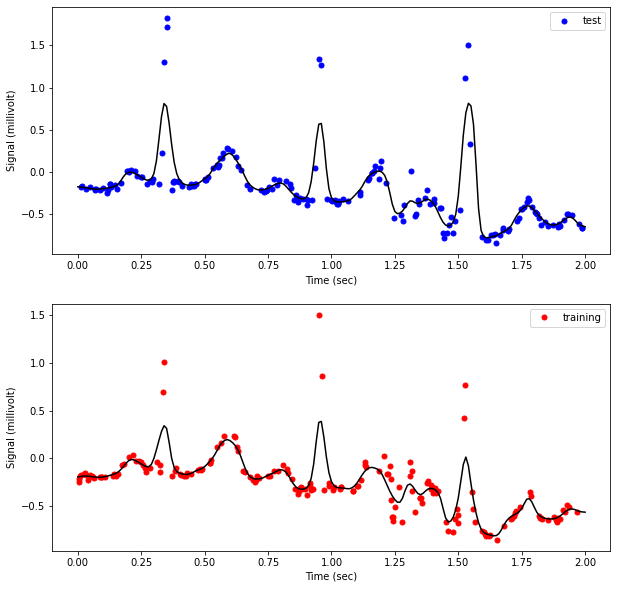

In [22]:
h = 0.02

# Training set

p_estimate = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_training[:,0])**2 / h**2) * x_training[:,1]) 
                    for x in data_interval]) / np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_training[:,0])**2 / h**2)) 
                                                           for x in data_interval]) 

fig, ax = plt.subplots(2, 1, figsize=(10,10)) 
plt.subplot(2, 1, 1)
plt.plot(x_training[:,0], x_training[:,1], "b.", markersize = 10, label = "test")
plt.plot(data_interval, p_estimate, "k-")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")  
plt.legend(prop={'size': 10})


# Test set

p_estimate = np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_test[:,0])**2 / h**2) * x_test[:,1]) 
                    for x in data_interval]) / np.asarray([np.sum(1.0 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_test[:,0])**2 / h**2)) 
                                                           for x in data_interval]) 

plt.subplot(2, 1, 2)
plt.plot(x_test[:,0], x_test[:,1], "r.", markersize = 10, label = "training")
plt.plot(data_interval, p_estimate, "k-")
plt.xlabel("Time (sec)")
plt.ylabel("Signal (millivolt)")  
plt.legend(prop={'size': 10})

plt.show()

### Root Mean Square Error

In [23]:
index = []

for i in x_test[:,0]:
    for r in range(len(data_interval)):
        if i < data_interval[r]: 
            index.append(r)
            break
            
index = np.array(index)

In [24]:
RMSE = (np.sum(([p_estimate[i] for i in index]- x_test[:,1])**2) / N ) ** 0.5

print("Kernel Smoother => RMSE is {} when h is {}".format(RMSE, h))

Kernel Smoother => RMSE is 0.16111447095092277 when h is 0.02
